In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Recordar obtener los URL "RAW" en Github

dataSet_url = "https://raw.githubusercontent.com/francopiria/Beer-Data-Science/main/beer_profile_and_ratings.csv"

In [9]:
df = pd.read_csv(dataSet_url, index_col=3)
print(df.columns)
print(df.head(1))

Index(['Name', 'Style', 'Brewery', 'Description', 'ABV', 'Min IBU', 'Max IBU',
       'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty',
       'Fruits', 'Hoppy', 'Spices', 'Malty', 'review_aroma',
       'review_appearance', 'review_palate', 'review_taste', 'review_overall',
       'number_of_reviews'],
      dtype='object')
                                    Name    Style              Brewery  \
Beer Name (Full)                                                         
Alaskan Brewing Co. Alaskan Amber  Amber  Altbier  Alaskan Brewing Co.   

                                                                         Description  \
Beer Name (Full)                                                                       
Alaskan Brewing Co. Alaskan Amber  Notes:Richly malty and long on the palate, wit...   

                                   ABV  Min IBU  Max IBU  Astringency  Body  \
Beer Name (Full)                                                              
Alaskan

In [5]:
score_variables_names = [
    "review_aroma",
    "review_appearance",
    "review_palate",
    "review_taste",
    "review_overall",
    "number_of_reviews"
]

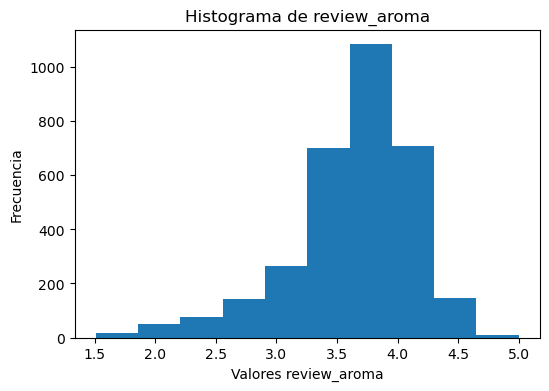

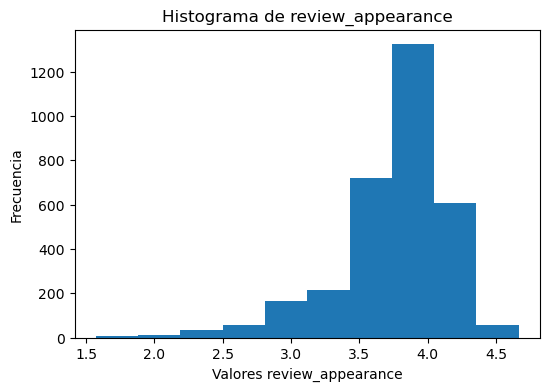

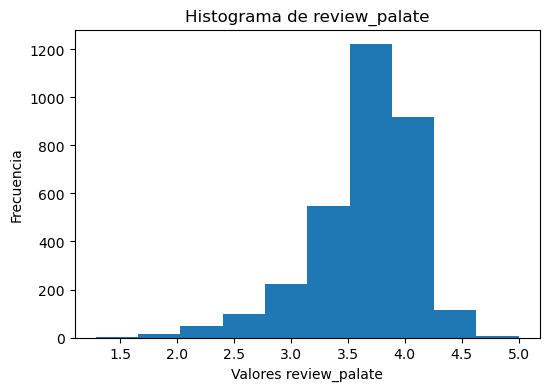

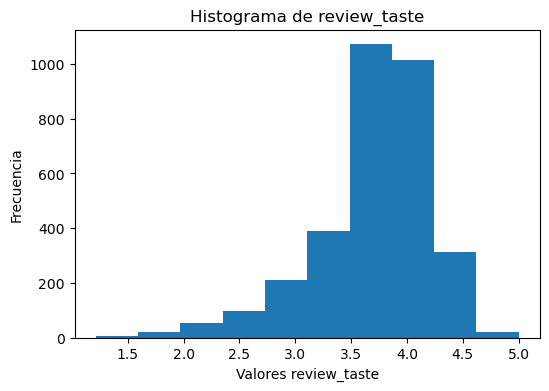

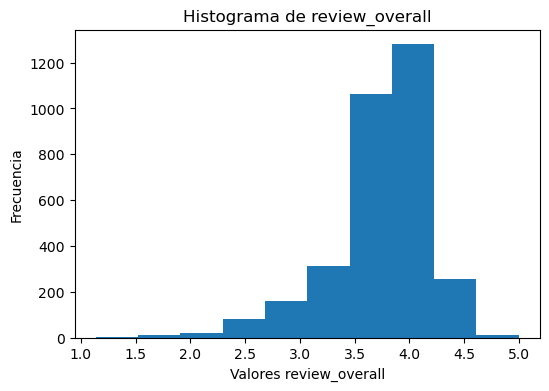

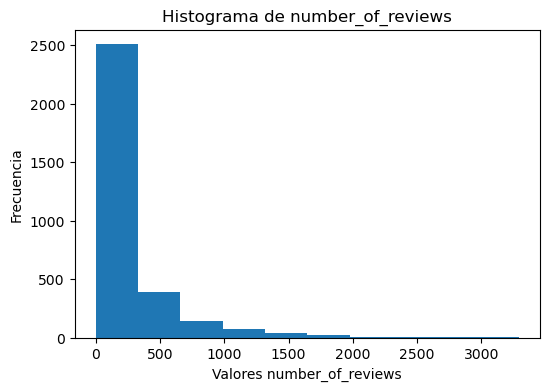

In [6]:
# Histogramas para evaluar la distribución de las variables de reviews

for columna in score_variables_names:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    plt.hist(df[columna])
    plt.xlabel(f'Valores {columna}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {columna}')
    plt.show()

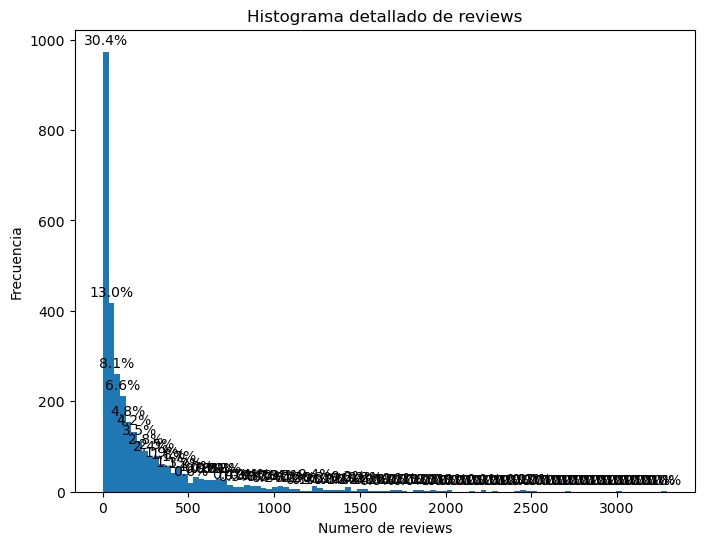

In [7]:
# Plot del histograma con más detalle, la idea es evaluar cual numero de reviews sería un mínimo aceptable
# para considerar los datos como validos (filtrar el dataset)
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(df['number_of_reviews'], bins=100) # Usa más bins para el rango de 0 a 250
total_reviews = df["number_of_reviews"].count()

for patch in patches:
    height = patch.get_height()
    porcentaje = (height / total_reviews) * 100
    plt.annotate(f'{porcentaje:.1f}%', xy=(patch.get_x() + patch.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')


plt.xlabel("Numero de reviews")
plt.ylabel('Frecuencia')
plt.title('Histograma detallado de reviews')
plt.show()

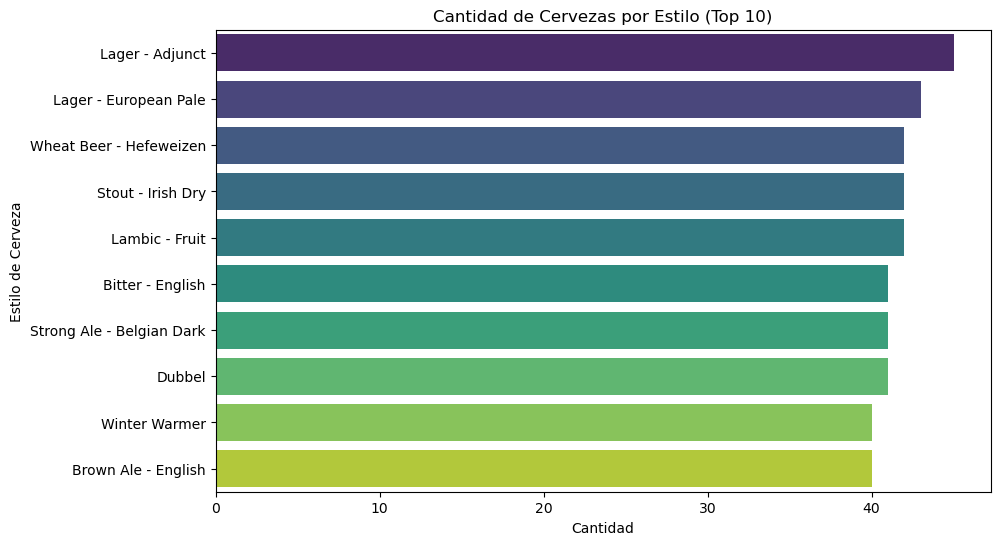

In [10]:
# Gráfico de barras de estilos de cerveza para evaluar cuales son las cervezas más producidas
plt.figure(figsize=(10, 6))
style_counts = df['Style'].value_counts().head(10)  # Top 10 estilos más comunes
sns.barplot(x=style_counts.values, y=style_counts.index, palette='viridis')
plt.xlabel('Cantidad')
plt.ylabel('Estilo de Cerveza')
plt.title('Cantidad de Cervezas por Estilo (Top 10)')
plt.show()

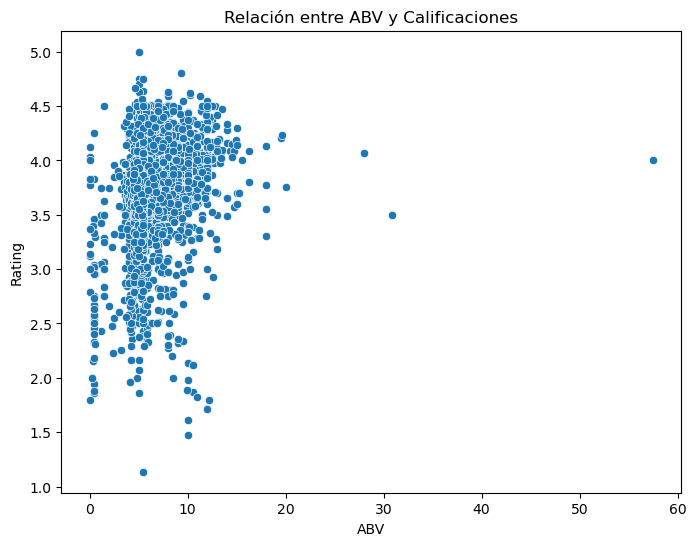

In [11]:
# Diagrama de dispersión ABV vs. calificaciones para evaluar correlación alcohol calificación
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ABV', y='review_overall', data=df)
plt.xlabel('ABV')
plt.ylabel('Rating')
plt.title('Relación entre ABV y Calificaciones')
plt.show()

# No parece haber correlación clara

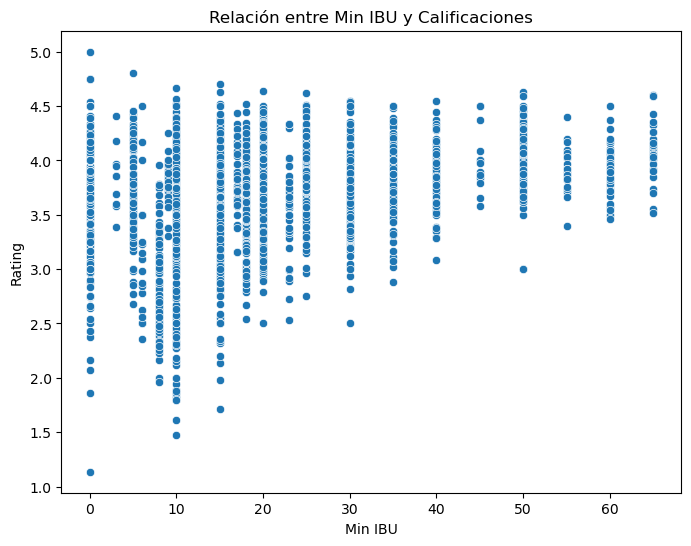

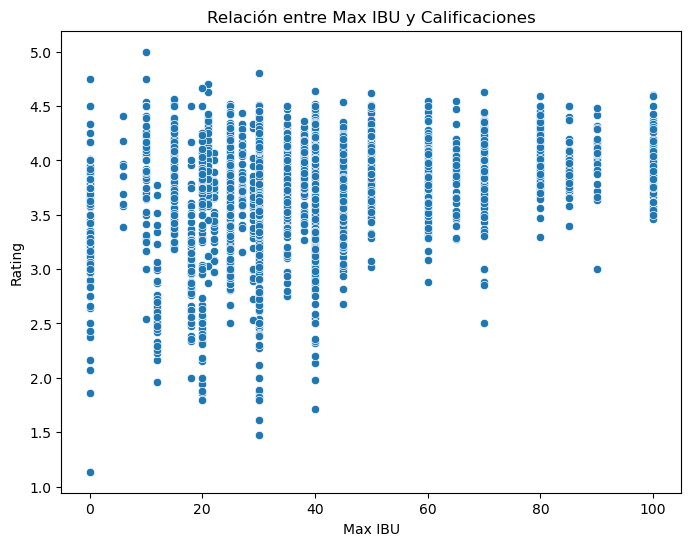

In [13]:
# Diagrama de dispersión IBU vs. calificaciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Min IBU', y='review_overall', data=df)
plt.xlabel('Min IBU')
plt.ylabel('Rating')
plt.title('Relación entre Min IBU y Calificaciones')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Max IBU', y='review_overall', data=df)
plt.xlabel('Max IBU')
plt.ylabel('Rating')
plt.title('Relación entre Max IBU y Calificaciones')
plt.show()

# Se ve que no hay cervezas de nota baja con alto amargor.
# Dentro de las de notas mas altas, hay de bajo y alto amargor
# Pendiente hacer el gráfico con el promedio de mínimo y máximo amargor

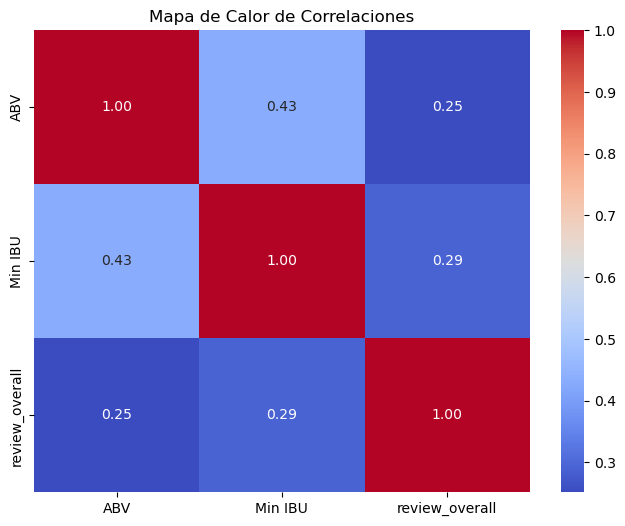

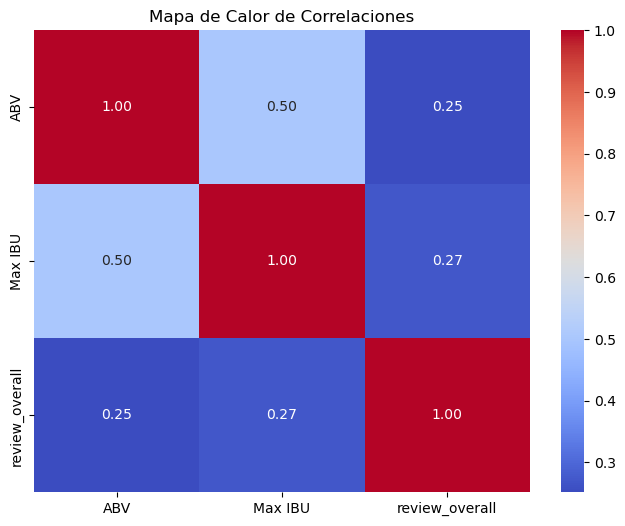

In [16]:
# Mapa de calor para correlaciones
plt.figure(figsize=(8, 6))
correlation_matrix = df[['ABV', 'Min IBU', 'review_overall']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

plt.figure(figsize=(8, 6))
correlation_matrix = df[['ABV', 'Max IBU', 'review_overall']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# Sería bueno ver correlaciones entre review overall con review aroma/amargor/etc, pendiente

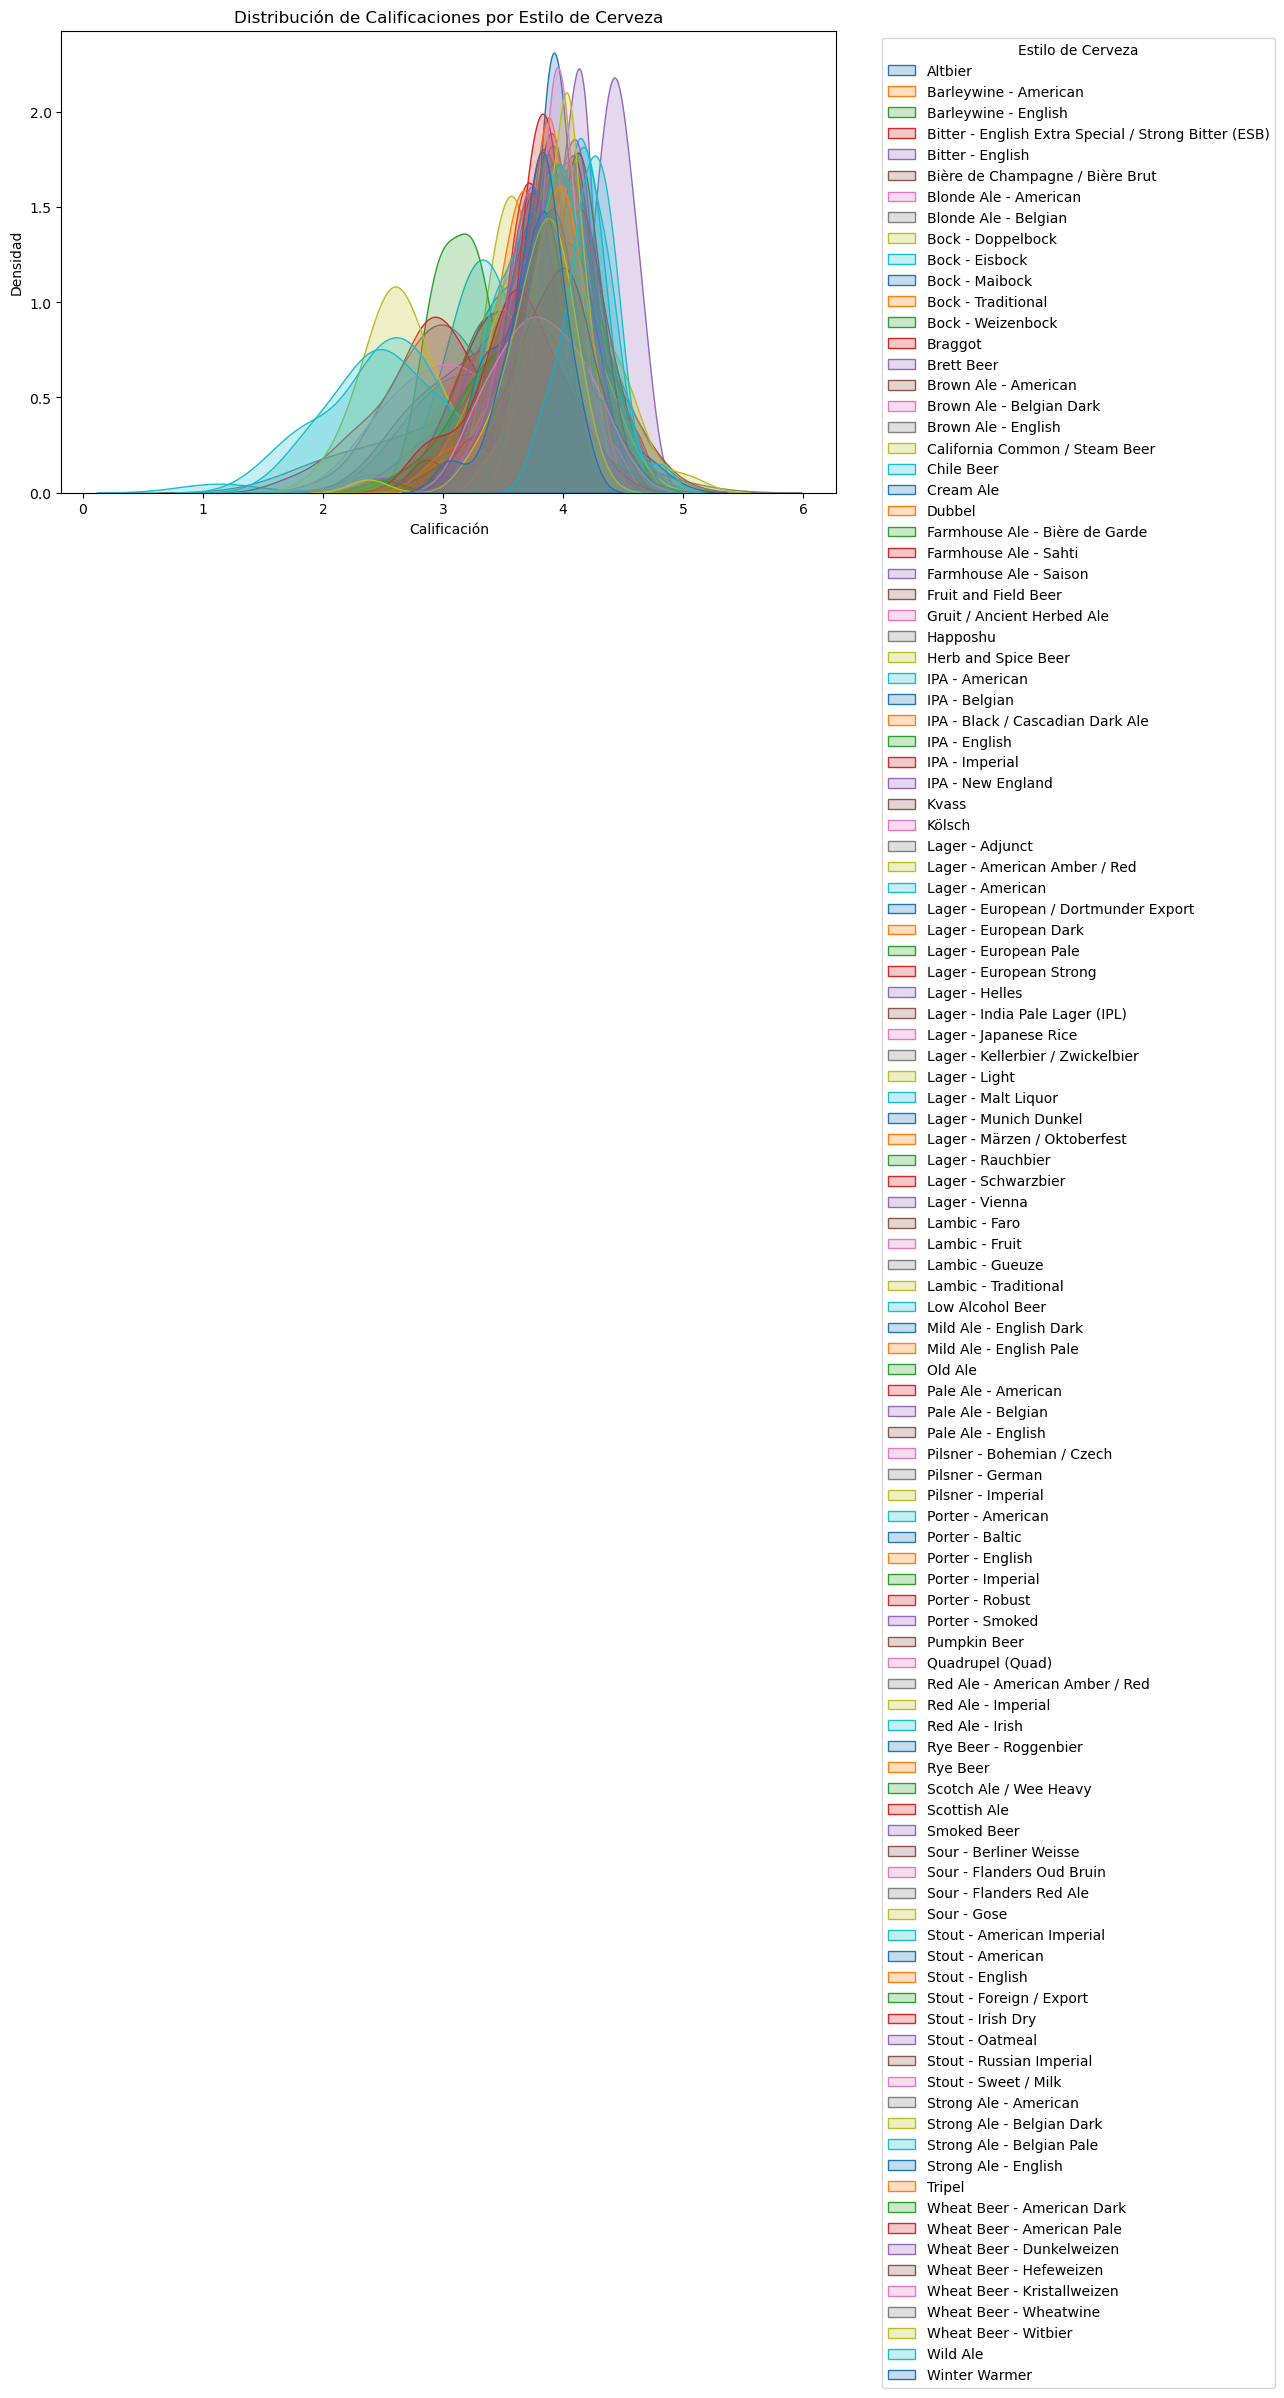

In [19]:
# Gráfico de densidad de calificaciones por estilo de cerveza

plt.figure(figsize=(10, 6))
for style in df['Style'].unique():
    sns.kdeplot(data=df[df['Style'] == style]['review_overall'], label=style, fill=True, common_norm=False)
    
plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.title('Distribución de Calificaciones por Estilo de Cerveza')
plt.legend(title='Estilo de Cerveza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Dificil de ver por ser tantos estilos
# Filtro el dataset para ver las mejores y las peores

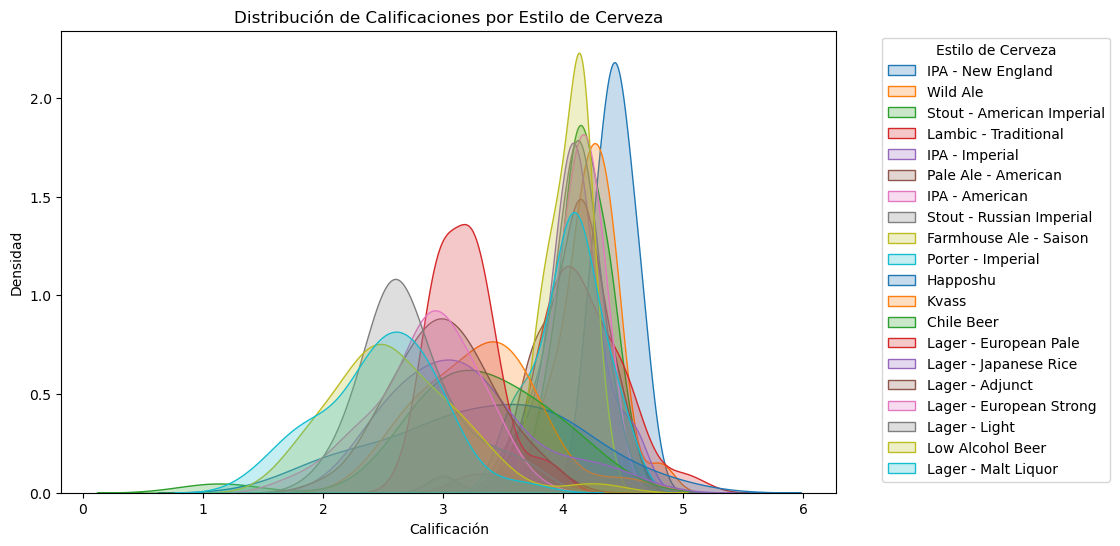

In [20]:
# Calcular la media de calificaciones por estilo de cerveza
mean_ratings = df.groupby('Style')['review_overall'].mean().sort_values(ascending=False)

# Obtener los 10 estilos con las calificaciones más altas y más bajas
top_styles = mean_ratings.head(10).index.tolist()
bottom_styles = mean_ratings.tail(10).index.tolist()

# Filtrar el DataFrame para obtener los datos correspondientes a los estilos seleccionados
selected_styles = top_styles + bottom_styles
filtered_df = df[df['Style'].isin(selected_styles)]

# Gráfico de densidad para los estilos seleccionados
plt.figure(figsize=(10, 6))
for style in selected_styles:
    sns.kdeplot(data=filtered_df[filtered_df['Style'] == style]['review_overall'], label=style, fill=True)

plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.title('Distribución de Calificaciones por Estilo de Cerveza')
plt.legend(title='Estilo de Cerveza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

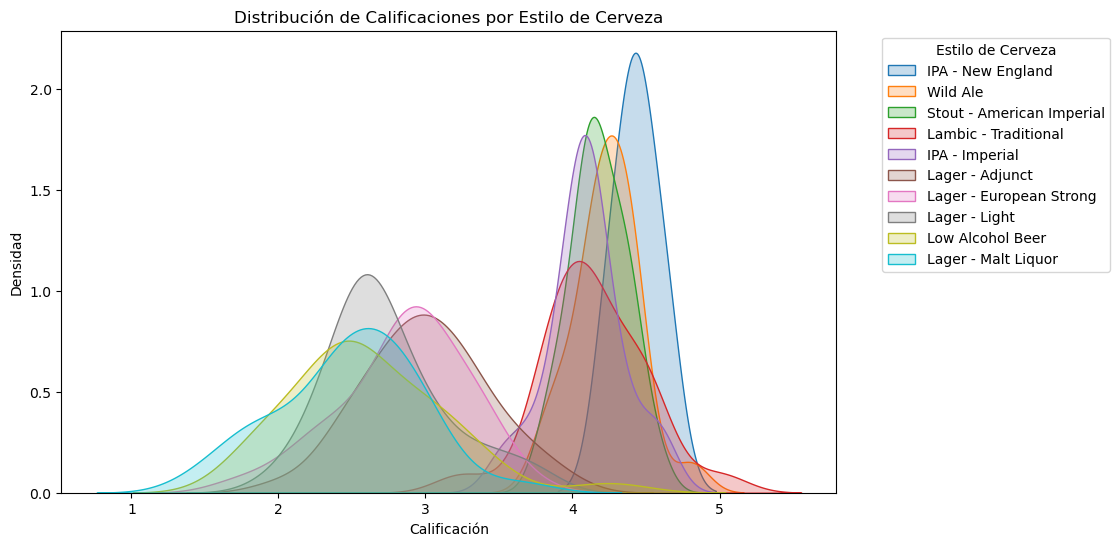

In [21]:
# Calcular la media de calificaciones por estilo de cerveza
mean_ratings = df.groupby('Style')['review_overall'].mean().sort_values(ascending=False)

# Obtener los 5 estilos con las calificaciones más altas y más bajas
top_styles = mean_ratings.head(5).index.tolist()
bottom_styles = mean_ratings.tail(5).index.tolist()

# Filtrar el DataFrame para obtener los datos correspondientes a los estilos seleccionados
selected_styles = top_styles + bottom_styles
filtered_df = df[df['Style'].isin(selected_styles)]

# Gráfico de densidad para los estilos seleccionados
plt.figure(figsize=(10, 6))
for style in selected_styles:
    sns.kdeplot(data=filtered_df[filtered_df['Style'] == style]['review_overall'], label=style, fill=True)

plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.title('Distribución de Calificaciones por Estilo de Cerveza')
plt.legend(title='Estilo de Cerveza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Las low alcohol beer parecen ser de las peor calificadas
# New england IPA parece ser de las mejor calificadas